<a href="https://colab.research.google.com/github/gaston411/Mi-Proyecto/blob/main/beto_topic_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BERT

# Instalo las fucniones necesarias

In [2]:
!pip install --upgrade tbb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.0 MB 4.1 MB/s 


In [4]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.4 MB 4.4 MB/s 
     |████████████████████████████████| 6.6 MB 48.6 MB/s 
     |████████████████████████████████| 596 kB 56.0 MB/s 
     |████████████████████████████████| 101 kB 9.3 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [5]:
!pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
!pip install pyyaml==5.4.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 636 kB 3.9 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0


In [7]:
!pip install bertopic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76 kB 2.4 MB/s 
     |████████████████████████████████| 5.2 MB 31.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 88 kB 5.9 MB/s 
     |████████████████████████████████| 85 kB 4.9 MB/s 
     |████████████████████████████████| 1.2 MB 51.9 MB/s 
     |████████████████████████████████| 1.1 MB 50.4 MB/s 
  Created wheel for hdbscan: filename=hdbscan-0.8.28-cp37-cp37m-linux_x86_64.whl size=2342120 sha256=e69c58b3a042cbe92f0fc1d3115895bcdacb2940f460a0208e9027e78056986e
  Stored in directory: /root/.cache/pip/wheels/6e/7a/5e/259ccc841c085fc41b99ef4a71e896b62f5161f2bc8a14c97a
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=e0bfd013021c231a075ebc1e79fc192cc7899b2ff2b4

In [ ]:
from pprint import pprint

# Similitud entre distintas oraciones - Bert

In [8]:
a = "purple is the best city in the forest"
b = "there is an art to getting your way and throwing bananas on to the street is not it"  # this is very similar to 'g'
c = "it is not often you find soggy bananas on the street"
d = "green should have smelled more tranquil but somehow it just tasted rotten"
e = "joyce enjoyed eating pancakes with ketchup"
f = "as the asteroid hurtled toward earth becky was upset her dentist appointment had been canceled"
g = "to get your way you must not bombard the road with yellow fruit"  # this is very similar to 'b'

In [9]:
# Importo las librerias de transformers y torch
from transformers import AutoTokenizer, AutoModel
import torch

In [10]:
# 
tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/bert-base-nli-mean-tokens')
model = AutoModel.from_pretrained('sentence-transformers/bert-base-nli-mean-tokens')

Downloading:   0%|          | 0.00/399 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/418M [00:00<?, ?B/s]

In [11]:
tokens = tokenizer([a, b, c, d, e, f, g],
                          max_length=128,
                          truncation=True,
                          padding='max_length',
                          return_tensors='pt')

In [12]:
tokens.keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

In [13]:
tokens['input_ids'][0]

tensor([ 101, 6379, 2003, 1996, 2190, 2103, 1999, 1996, 3224,  102,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0])

In [14]:
outputs = model(**tokens)
outputs.keys()

odict_keys(['last_hidden_state', 'pooler_output'])

In [15]:
embeddings = outputs.last_hidden_state
embeddings[0]

tensor([[-0.6239, -0.2058,  0.0411,  ...,  0.1490,  0.5681,  0.2381],
        [-0.3694, -0.1485,  0.3780,  ...,  0.4204,  0.5553,  0.1441],
        [-0.7221, -0.3813,  0.2031,  ...,  0.0761,  0.5162,  0.2813],
        ...,
        [-0.1894, -0.3711,  0.3034,  ...,  0.1536,  0.3265,  0.1376],
        [-0.2496, -0.5227,  0.2341,  ...,  0.3419,  0.3164,  0.0256],
        [-0.3311, -0.4430,  0.3492,  ...,  0.3655,  0.2910,  0.0728]],
       grad_fn=<SelectBackward0>)

In [16]:
embeddings[0].shape

torch.Size([128, 768])

In [17]:
mask = tokens['attention_mask'].unsqueeze(-1).expand(embeddings.size()).float()
mask.shape

torch.Size([7, 128, 768])

In [18]:
mask[0]

tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [19]:
masked_embeddings = embeddings * mask
masked_embeddings[0]

tensor([[-0.6239, -0.2058,  0.0411,  ...,  0.1490,  0.5681,  0.2381],
        [-0.3694, -0.1485,  0.3780,  ...,  0.4204,  0.5553,  0.1441],
        [-0.7221, -0.3813,  0.2031,  ...,  0.0761,  0.5162,  0.2813],
        ...,
        [-0.0000, -0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [-0.0000, -0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [-0.0000, -0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]],
       grad_fn=<SelectBackward0>)

In [20]:
summed = torch.sum(masked_embeddings, 1)
summed.shape

torch.Size([7, 768])

In [21]:
counted = torch.clamp(mask.sum(1), min=1e-9)
counted.shape

torch.Size([7, 768])

In [22]:
mean_pooled = summed / counted #Estos son nuestros vectores de oraciones.
mean_pooled.shape

torch.Size([7, 768])

In [23]:
# Buscamos la similitus coseno
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

In [24]:
# convert to numpy array from torch tensor
mean_pooled = mean_pooled.detach().numpy()

# calculate similarities (will store in array)
scores = np.zeros((mean_pooled.shape[0], mean_pooled.shape[0]))
for i in range(mean_pooled.shape[0]):
    scores[i, :] = cosine_similarity(
        [mean_pooled[i]],
        mean_pooled
    )[0]

In [25]:
scores

array([[ 1.00000036,  0.18692756,  0.28297701,  0.29628256,  0.27451015,
         0.10176265,  0.21696275],
       [ 0.18692756,  1.00000024,  0.72058785,  0.51428938,  0.11749659,
         0.19306947,  0.66182339],
       [ 0.28297701,  0.72058785,  1.00000012,  0.4886443 ,  0.23568964,
         0.1715714 ,  0.5599308 ],
       [ 0.29628256,  0.51428938,  0.4886443 ,  0.99999976,  0.26985508,
         0.37889439,  0.52388817],
       [ 0.27451017,  0.11749662,  0.23568963,  0.26985508,  1.00000024,
         0.23422134, -0.01599768],
       [ 0.10176267,  0.1930695 ,  0.1715714 ,  0.37889427,  0.23422134,
         1.00000036,  0.22319682],
       [ 0.21696278,  0.66182333,  0.5599308 ,  0.52388817, -0.01599768,
         0.22319683,  0.99999988]])

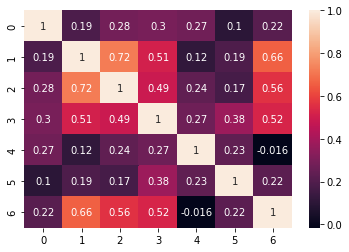

In [26]:
import seaborn as sns
sns.heatmap(scores,annot=True)

In [27]:
!pip install sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [28]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('bert-base-nli-mean-tokens')

Downloading:   0%|          | 0.00/391 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.95k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/399 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

In [29]:
sentence_embeddings = model.encode([a, b, c, d, e, f, g])

In [30]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# calculate similarities (will store in array)
scores = np.zeros((sentence_embeddings.shape[0], sentence_embeddings.shape[0]))
for i in range(sentence_embeddings.shape[0]):
    scores[i, :] = cosine_similarity(
        [sentence_embeddings[i]],
        sentence_embeddings
    )[0]

In [31]:
scores

array([[ 1.00000036,  0.18692765,  0.28297701,  0.29628256,  0.27451015,
         0.10176264,  0.21696275],
       [ 0.18692765,  1.        ,  0.72058785,  0.51428944,  0.11749655,
         0.19306952,  0.66182357],
       [ 0.28297701,  0.72058785,  1.00000012,  0.4886443 ,  0.23568964,
         0.17157143,  0.5599308 ],
       [ 0.29628256,  0.51428944,  0.4886443 ,  0.99999976,  0.26985508,
         0.37889436,  0.52388817],
       [ 0.27451017,  0.11749656,  0.23568963,  0.26985508,  1.00000024,
         0.23422137, -0.01599768],
       [ 0.10176265,  0.19306953,  0.1715714 ,  0.3788943 ,  0.23422137,
         1.00000024,  0.22319683],
       [ 0.21696278,  0.66182357,  0.5599308 ,  0.52388817, -0.01599768,
         0.22319682,  0.99999988]])

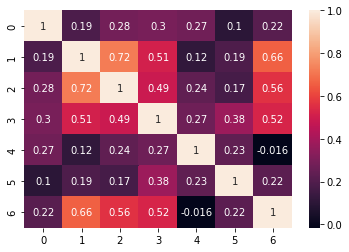

In [32]:
sns.heatmap(scores, annot=True)

In [33]:
from sentence_transformers import SentenceTransformer
sentences = ["This is an example sentence", "Each sentence is converted"]

model = SentenceTransformer('dccuchile/bert-base-spanish-wwm-cased')
embeddings = model.encode(sentences)
print(embeddings)


Downloading:   0%|          | 0.00/391 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/5.92k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/648 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/134 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/480k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/364 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/242k [00:00<?, ?B/s]

No sentence-transformers model found with name /root/.cache/torch/sentence_transformers/dccuchile_bert-base-spanish-wwm-cased. Creating a new one with MEAN pooling.
Some weights of the model checkpoint at /root/.cache/torch/sentence_transformers/dccuchile_bert-base-spanish-wwm-cased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model fr

[[-0.3833326   0.25313267 -0.50062776 ... -0.1097329  -0.0155858
  -0.42746824]
 [-0.31825754  0.26287922 -0.23416442 ... -0.20329538  0.13960756
  -0.08673388]]


In [34]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('dccuchile/bert-base-spanish-wwm-cased')

No sentence-transformers model found with name /root/.cache/torch/sentence_transformers/dccuchile_bert-base-spanish-wwm-cased. Creating a new one with MEAN pooling.
Some weights of the model checkpoint at /root/.cache/torch/sentence_transformers/dccuchile_bert-base-spanish-wwm-cased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model fr

In [35]:
sentence = ['I-PROEMIO: Sr. JUEZ NACIONAL:HORTAS MARIA ANDREA S. perito medico de oficio en los siguientes autos, con domicilio constituido en la calle Austria 3º piso Dpto.  de esta Capital Z , tel. - domicilio electronico mashortas@,  -3 en cumplimiento lo dispuesto por  referente a los presentes autos y despues de haber examinado a quien dijo ser Boiero Franco Ivan quien se tomaron en el momento del examen el estado clinico actual se consideraron capacidad generica y en particular los puntos de pericia solicitados por las partes',
            'II-ANTECEDENTES DE INTERES MEDICO-LEGAL:las 5:h se encontraba en camino al trabajo y al cruzar la calle piso una piedra con el pie izquierdo que queda trabado girando su cuerpo y sufriendo una entorsis en su tobillo izquierdo asi o consecuencia del fuerte dolor es que da aviso a su empleador quien realiza la correspondiente denuncia a la ART donde le realizan estudios radiograficos le indican reposo y kinesiologia otorgandole el alta medica sin incapacidad. Cabe destacar que previo al accidente nunca presento tampoco ingresos a la ART por dolencias en la zona denunciada . Jamas se le realizo un examen preocupacional ni periodico . Sostiene que presenta una Incapacidad del 8%.',
            'accidente ocurrido fue denunciado a Swiss Medical bajo el siniestro el cual fue aceptado por el demandado, y se le brindo las prestaciones correspondientes en especie manteniendo la atencion hasta el en que fue dado de alta sin incapacidad.']

In [36]:
embeddings = model.encode(sentence)

# BERTOPIC

In [42]:
from bertopic import BERTopic
from sklearn.datasets import fetch_20newsgroups
from sentence_transformers import SentenceTransformer

docs = fetch_20newsgroups(subset='all')['data']
sentence_model = SentenceTransformer("all-MiniLM-L6-v2")
topic_model = BERTopic(embedding_model=sentence_model)
topics, probs = topic_model.fit_transform(docs)


Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


In [47]:
topic_model.visualize_barchart()

In [96]:
topic_model.save("topic_model_english")

In [74]:
df = pd.read_csv("/content/pericias_medicas.csv", delimiter=",", encoding='utf-8')

In [76]:
docs = df.text.apply(str)

In [77]:
modelo_oraciones = SentenceTransformer("hiiamsid/sentence_similarity_spanish_es")
modelo_topico = BERTopic(embedding_model=modelo_oraciones)
topicos, probabilidades = modelo_topico.fit_transform(docs)

In [78]:
modelo_topico.save("pericias_topics_model")

In [80]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [85]:
modelo_topico.get_topic_freq().head(10)

,Topic,Count
0,-1,937
1,0,175
2,1,91
3,2,90
4,3,84
5,4,74
6,5,73
7,6,62
8,7,49
9,8,47


In [92]:
modelo_topico.get_topic(21)

[('enfermedad', 0.010808062144380024),
 ('no', 0.008176321606630866),
 ('de', 0.0076480288528692954),
 ('las', 0.007512995146765672),
 ('daño', 0.007505657049255132),
 ('editorial', 0.007487762125832668),
 ('la', 0.007322693545214128),
 ('ser', 0.00718950747701332),
 ('que', 0.007052584882355826),
 ('si', 0.006955190905998299)]

In [93]:
modelo_topico.visualize_topics()

In [95]:
modelo_topico.visualize_barchart()

# PRUEBAS DE TOPIC- MODELING - BERTopic

In [97]:
df = pd.read_csv("/content/df_ExpTitulosMayusculas.csv", delimiter=",", encoding='utf-8')

In [100]:
docs = df.expediente.apply(str)

In [101]:
!pip install textcleaner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for textcleaner: filename=textcleaner-0.4.26-py3-none-any.whl size=4737 sha256=765abd8a86d97d8c14ce3ae4f3f35e1fd413ed19bd47ef9c1100884e74c0c6fb
  Stored in directory: /root/.cache/pip/wheels/67/e1/1a/8a3dc9c64347e08039c1e69924c9af6ba0a395a0ed92cfb493
Successfully built textcleaner


In [178]:
# limpiar texto
import re, string, unicodedata, nltk
stops = nltk.corpus.stopwords.words('spanish')
def limpiar_palabras(text: str) -> str:
    '''
    Limpiar palabras en títulos. Solamente deja palabras y espacios en blanco.
    Params:
        **text**:texto a ser limpiado de palabras no desaeadas
    '''
    text = re.sub(r'[^\w\s\.\d\n%]+',' ',text)
    text = [i for i in text.split() if i not in stops and len(i) > 3]
    return ' '.join(text)

In [193]:
expediente = []
for i in range(len(docs)):
  expediente.append((limpiar_palabras(docs[i])))

In [162]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('paraphrase-multilingual-mpnet-base-v2')
embeddings = model.encode(expediente, show_progress_bar=True)

Downloading:   0%|          | 0.00/690 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.77k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/723 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/402 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Batches:   0%|          | 0/13 [00:00<?, ?it/s]

In [163]:
modelo2_oraciones = SentenceTransformer("hiiamsid/sentence_similarity_spanish_es")
modelo2_topico = BERTopic(embedding_model=modelo2_oraciones)
topicos2, probabilidades2 = modelo2_topico.fit_transform(expediente)

In [171]:
modelo2_topico.get_topic(10)

[('se', 0.033455590723139396),
 ('autos', 0.031063620300207075),
 ('medico', 0.02983364970454552),
 ('examen', 0.02909792590339507),
 ('si', 0.028493870692081924),
 ('ver', 0.027088695537673),
 ('incapacidad', 0.02382258046376807),
 ('fisico', 0.022073617792339604),
 ('presenta', 0.021863954992004404),
 ('actor', 0.021285571244489956)]

In [173]:
modelo2_topico.visualize_topics()

In [174]:
modelo2_topico.visualize_barchart()

In [176]:
modelo2_topico.visualize_heatmap()

In [180]:
modelo3_oraciones = SentenceTransformer("hiiamsid/sentence_similarity_spanish_es")
modelo3_topico = BERTopic(embedding_model=modelo3_oraciones)
topicos3, probabilidades3 = modelo3_topico.fit_transform(expediente)

In [182]:
modelo3_topico.get_topic(0)

[('medico', 0.023360514657738175),
 ('examen', 0.019811074184760507),
 ('presenta', 0.01756037483450374),
 ('actora', 0.01630893087605726),
 ('incapacidad', 0.015073994274399613),
 ('refiere', 0.014851230722724108),
 ('accidente', 0.01478424423965805),
 ('perito', 0.014569409180635519),
 ('trabajo', 0.014235992584211763),
 ('actor', 0.013899850543210489)]

In [184]:
modelo3_topico.visualize_topics()

In [185]:
modelo3_topico.visualize_barchart()

In [186]:
modelo3_topico.visualize_heatmap()

In [189]:
modelo3_topico.save('topic_modeling_3')

In [194]:
# modelo4 esta entrenado con los 876 expedientes con titulos en mayusculas.
modelo4_oraciones = SentenceTransformer("hiiamsid/sentence_similarity_spanish_es")
modelo4_topico = BERTopic(embedding_model=modelo4_oraciones, nr_topics=10)
topicos4, probabilidades4 = modelo4_topico.fit_transform(expediente)

In [195]:
modelo4_topico.get_topics()

{-1: [('actor', 0.024003240322255065),
  ('dolor', 0.02176500877569932),
  ('incapacidad', 0.02015826347764203),
  ('examen', 0.01873971318781653),
  ('medico', 0.017776576574104443),
  ('respuesta', 0.01740244061302145),
  ('presenta', 0.016877749463738136),
  ('accidente', 0.01551509797912823),
  ('columna', 0.01492566959834709),
  ('informe', 0.01360868834342426)],
 0: [('medico', 0.021569681697571303),
  ('actor', 0.019758872562366456),
  ('examen', 0.019410390903623963),
  ('incapacidad', 0.017471359706539787),
  ('accidente', 0.01644801877021392),
  ('presenta', 0.016088589312973644),
  ('autos', 0.014630112114253375),
  ('informe', 0.014031357645186197),
  ('dolor', 0.012740918576424369),
  ('actora', 0.012287101945719235)],
 1: [('años', 0.025754145669688772),
  ('presente', 0.018376711436672855),
  ('persona', 0.017069725849110075),
  ('tecnicas', 0.0156454623742002),
  ('psicologico', 0.014834183803021891),
  ('casa', 0.014801988998304694),
  ('pericial', 0.0145808207567629),

In [196]:
modelo4_topico.visualize_topics()

In [198]:
modelo4_topico.visualize_barchart()

In [199]:
modelo4_topico.visualize_heatmap()

In [200]:
modelo4_topico.save('topic_modeling_modelo4')